# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [111]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1400)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1400)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [112]:
city1 = []
cloudy = []
country = []
date = []
humid = []
lat = []
lng = []
max_temp = []
wind = []
index = 0


print("Data Pull ")
print("************************")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# append city information into lists
for index, city in enumerate(cities, start = 0):
    try:
        response = requests.get(query_url + city).json()
        city1.append(response["name"])
        cloudy.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humid.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind.append(response["wind"]["speed"])
        
        index +=1
          
        print(f"City search #{index} : {city}") 
        
    except(KeyError, IndexError):
        print("City not found.")
        

print("************************")
print(" Complete")



Data Pull 
************************
City search #1 : la palma
City search #2 : ayagoz
City search #3 : paamiut
City search #4 : mocajuba
City search #5 : airai
City search #6 : klaksvik
City search #7 : codrington
City search #8 : khatanga
City search #9 : rikitea
City search #10 : ushuaia
City search #11 : port alfred
City search #12 : cape town
City search #13 : lebu
City search #14 : acapulco
City search #15 : mataura
City search #16 : busselton
City search #17 : comodoro rivadavia
City search #18 : macherla
City search #19 : bonthe
City search #20 : dikson
City search #21 : kaitangata
City search #22 : havelock
City search #23 : price
City search #24 : avarua
City search #25 : east london
City search #26 : zalantun
City search #27 : atuona
City search #28 : eenhana
City search #29 : billings
City not found.
City search #31 : samarai
City search #32 : ponta do sol
City search #33 : provideniya
City search #34 : georgetown
City search #35 : grindavik
City search #36 : darnah
City sea

City search #306 : lasa
City search #307 : leshukonskoye
City search #308 : yerbogachen
City not found.
City search #310 : lidice
City search #311 : mehamn
City search #312 : butaritari
City search #313 : pangnirtung
City search #314 : opelousas
City search #315 : sidvokodvo
City search #316 : champerico
City search #317 : port augusta
City search #318 : boguchany
City search #319 : yar-sale
City search #320 : igrim
City search #321 : abnub
City search #322 : nhulunbuy
City not found.
City search #324 : verkhovazhye
City not found.
City search #326 : erenhot
City search #327 : olden
City search #328 : korgen
City search #329 : chuhuyiv
City search #330 : aklavik
City search #331 : jiujiang
City search #332 : cabo san lucas
City search #333 : araouane
City search #334 : jardim
City search #335 : mbeya
City search #336 : storforshei
City search #337 : la paz
City search #338 : country club
City search #339 : lodja
City search #340 : okhotsk
City search #341 : kingsville
City search #342 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [113]:
# Create a panda data frame using data retrieved
weather = pd.DataFrame({ 
                "City" : city1,
                "Cloudiness" : cloudy,
                "Country" : country,
                "Date" : date,
                "Humidity" : humid,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : max_temp,
                "Wind Speed" : wind
})
# Display the Data Frame
weather

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,La Palma,90,US,1619280900,77,33.8464,-118.0467,63.00,3.44
1,Ayagoz,3,KZ,1619280901,39,47.9714,80.4392,36.07,4.72
2,Paamiut,33,GL,1619280901,76,61.9940,-49.6678,36.99,9.06
3,Mocajuba,86,BR,1619280901,89,-2.5842,-49.5072,81.81,4.56
4,Airai,47,TL,1619280861,90,-8.9266,125.4092,57.24,2.10
...,...,...,...,...,...,...,...,...,...
534,Namatanai,53,PG,1619281038,80,-3.6667,152.4333,78.44,5.91
535,Muramatsu,100,JP,1619281038,70,37.6833,139.1833,55.35,0.87
536,Afikpo,100,NG,1619281038,71,5.8931,7.9374,82.78,8.72
537,Monforte de Lemos,98,ES,1619281039,67,42.5216,-7.5142,62.01,3.00


In [167]:
# Save city data into a csv file, index =false, does not save index in csv
weather.to_csv("data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [39]:
#  Get the indices of cities that have humidity over 100%.


In [40]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

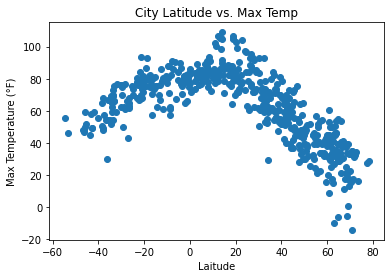

In [115]:


# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather["Lat"], weather["Max Temp"])
plt.title("City Latitude vs. Max Temp")
plt.xlabel("Laitude")

plt.ylabel("Max Temperature (°F)")

# Save Scatter Plot as .pngs
plt.savefig("Graphs/City Latitude vs Max Temperature.png")



## Latitude vs. Humidity Plot

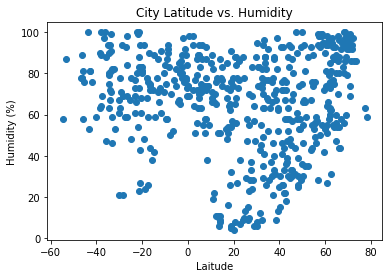

In [116]:


# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather["Lat"], weather["Humidity"])

plt.title("City Latitude vs. Humidity")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")

plt.savefig("Graphs/City Latitude vs Humidity.png")



## Latitude vs. Cloudiness Plot

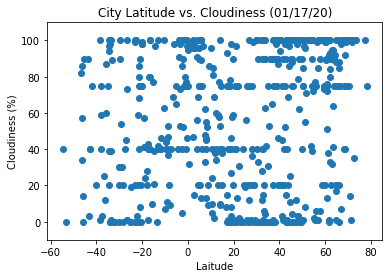

In [119]:


# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather["Lat"], weather["Cloudiness"])

plt.title("City Latitude vs. Cloudiness (01/17/20)")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")

# Set y axis limit to show limits at 0% and 100%
plt.ylim(-10,110)
plt.savefig("Graphs/City Latitude vs Cloudiness.png")



## Latitude vs. Wind Speed Plot

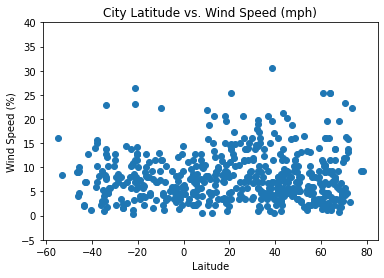

In [124]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather["Lat"], weather["Wind Speed"])
plt.title("City Latitude vs. Wind Speed (mph)")

plt.xlabel("Laitude")
plt.ylabel("Wind Speed (%)")


plt.ylim(-5,40)

plt.savefig("Graphs/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [146]:
import scipy.stats as stats

# split dataframe into northern and southern
northern_hemi = weather.loc[weather["Lat"] >= 0]
southern_hemi = weather.loc[weather["Lat"] < 0]

# Define function for x is x-axis and y-axis pulled from weather dataframe
def linear_regress(x,y):
    print(f"The r-value is : {round(stats.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress,"r-")
    return line_eq

# Define a fuction writing equation a and b are location of ploted equation
#starting from y
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : -0.86


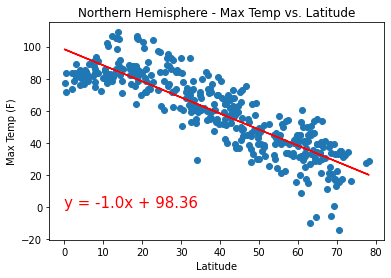

In [147]:
# Call an function #1
equation = linear_regress(northern_hemi["Lat"], northern_hemi["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("Graphs/Northern Hemisphere - Max Temp vs. Latitude.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : 0.7


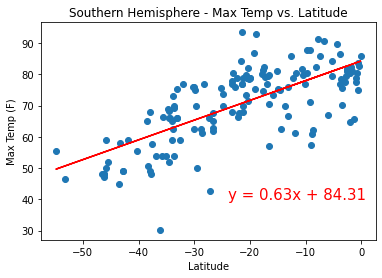

In [148]:


# Call an function #1
equation = linear_regress(southern_hemi["Lat"],southern_hemi["Max Temp"])

# Call an function #2
annotate(equation, -24, 40)

plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("Graphs/Southern Hemisphere - Max Temp vs. Latitude.png")



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.21


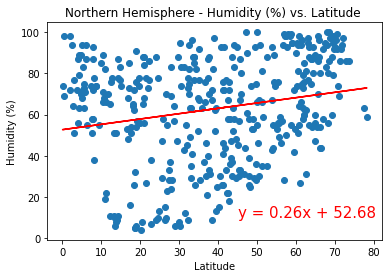

In [149]:
equation = linear_regress(northern_hemi["Lat"], northern_hemi["Humidity"])
annotate(equation, 45, 10)


plt.title("Northern Hemisphere - Humidity (%) vs. Latitude ")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Graphs/Northern Hemisphere - Humidity (%) vs. Latitude.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.01


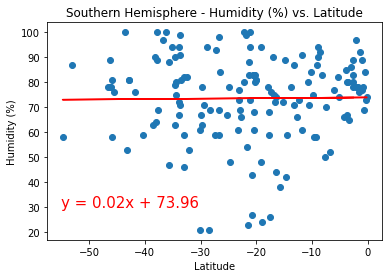

In [154]:

equation = linear_regress(southern_hemi["Lat"], southern_hemi["Humidity"])

annotate(equation, -55, 30)

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Graphs/Southern Hemisphere - Humidity (%) vs. Latitude.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.23


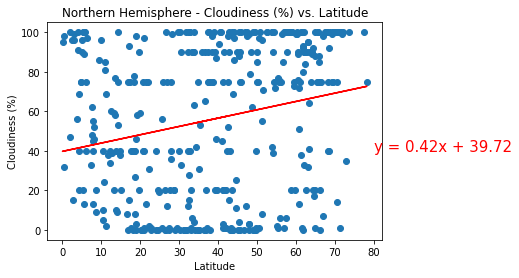

In [152]:

equation = linear_regress(northern_hemi["Lat"], northern_hemi["Cloudiness"])
annotate(equation, 80, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Graphs/Northern Hemisphere - Cloudiness (%) vs. Latitude.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.22


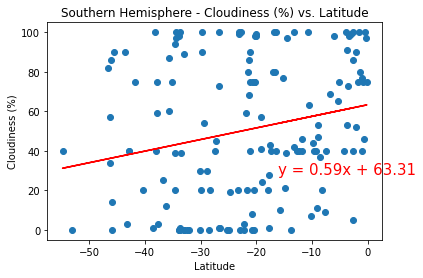

In [160]:
equation = linear_regress(southern_hemi["Lat"], southern_hemi["Cloudiness"])
annotate(equation, -16, 28)
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Graphs/Southern Hemisphere - Cloudiness (%) vs. Latitude.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : -0.04


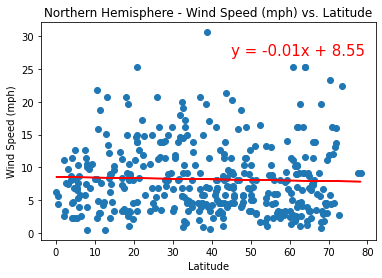

In [163]:
equation = linear_regress(northern_hemi["Lat"], northern_hemi["Wind Speed"])
annotate(equation, 45, 27)


plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("Graphs/Northern Hemisphere - Wind Speed vs. Latitude.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : -0.11


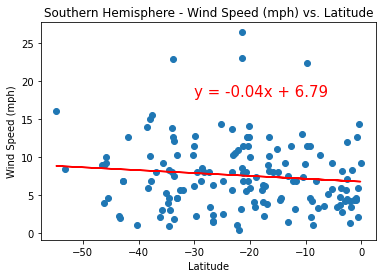

In [165]:
equation = linear_regress(southern_hemi["Lat"], southern_hemi["Wind Speed"])
annotate(equation, -30, 18)

plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


plt.savefig("Graphs/Southern Hemisphere - Wind Speed vs. Latitude.png")